In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

# 2D - Layer Normalization

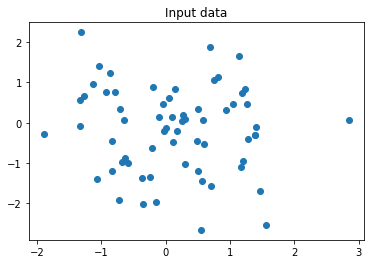

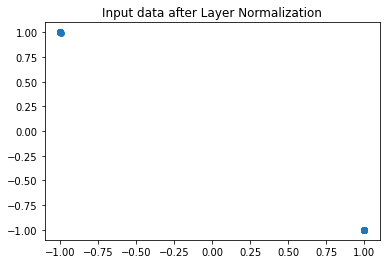

In [2]:
input_data = torch.randn(64,2)
output = nn.LayerNorm([2], elementwise_affine=False)(input_data)

plt.title('Input data')
plt.scatter(input_data[:,0], input_data[:,1])
plt.savefig('Input_data.svg', bbox_inches='tight')
plt.show()

plt.title('Input data after Layer Normalization')
plt.scatter(output[:,0], output[:,1])
plt.savefig('output_data.svg', bbox_inches='tight')
plt.show()

# 3D Layer Normalization

<ipython-input-3-09ecbd1bc21e>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='3d')


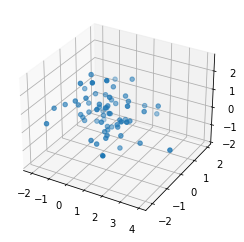

<ipython-input-3-09ecbd1bc21e>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='3d')


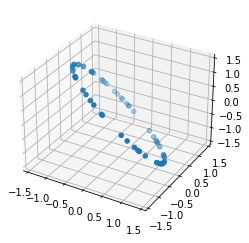

In [3]:
input_data = torch.randn(64,3)
output = nn.LayerNorm([3], elementwise_affine=False)(input_data)

fig = plt.figure()
plt.title('Input data')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(input_data[:,0], input_data[:,1], input_data[:,2])
plt.savefig('input3d.svg', bbox_inches='tight')
plt.show()


fig = plt.figure()
plt.title('Input data after Layer Normalization')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(output[:,0], output[:,1], output[:,2])
plt.savefig('output3d.svg', bbox_inches='tight')
plt.show()

# Different Scaling Factors for 2D Layer Normalization

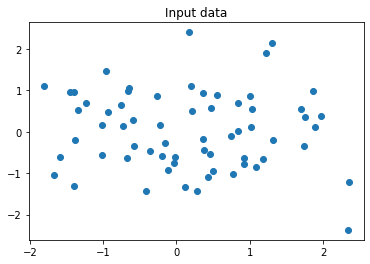

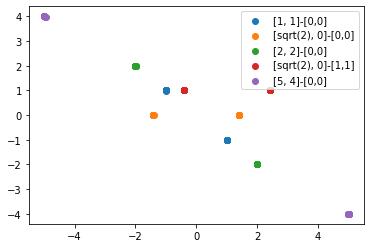

In [4]:
input_data = torch.randn(64,2)

transforms = []
ln = []

transforms.append('[1, 1]-[0,0]')
ln.append(nn.LayerNorm([2], elementwise_affine=True))
ln[-1].weight.data = torch.tensor([ 1, 1], dtype=torch.float32)
ln[-1].bias.data = torch.tensor([ 0, 0], dtype=torch.float32)

transforms.append('[sqrt(2), 0]-[0,0]')
ln.append(nn.LayerNorm([2], elementwise_affine=True))
ln[-1].weight.data = torch.tensor([ (np.sqrt(2)), 0], dtype=torch.float32)
ln[-1].bias.data = torch.tensor([ 0, 0], dtype=torch.float32)

transforms.append('[2, 2]-[0,0]')
ln.append(nn.LayerNorm([2], elementwise_affine=True))
ln[-1].weight.data = torch.tensor([ 2, 2], dtype=torch.float32)
ln[-1].bias.data = torch.tensor([ 0, 0], dtype=torch.float32)

transforms.append('[sqrt(2), 0]-[1,1]')
ln.append(nn.LayerNorm([2], elementwise_affine=True))
ln[-1].weight.data = torch.tensor([ (np.sqrt(2)), 0], dtype=torch.float32)
ln[-1].bias.data = torch.tensor([ 1, 1], dtype=torch.float32)

transforms.append('[5, 4]-[0,0]')
ln.append(nn.LayerNorm([2], elementwise_affine=True))
ln[-1].weight.data = torch.tensor([ 5, 4], dtype=torch.float32)
ln[-1].bias.data = torch.tensor([ 0, 0], dtype=torch.float32)


plt.title('Input data')
plt.scatter(input_data[:,0], input_data[:,1])
#plt.savefig('input3d.svg', bbox_inches='tight')
plt.show()



for label, norm in zip(transforms, ln):
    output = norm(input_data).detach()    
    plt.scatter(output[:,0], output[:,1], label=label)
    
#plt.savefig('output3d.svg', bbox_inches='tight')
plt.legend()
plt.show()

# Rotating the 2D hypersphere

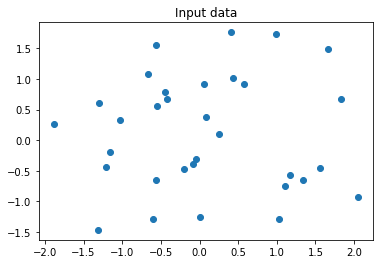

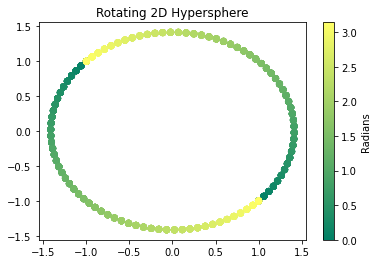

In [5]:
input_data = torch.randn(32,2)

transforms = []
ln = []

for i in np.linspace(0, np.pi,50):
    transforms.append(i)
    ln.append(nn.LayerNorm([2], elementwise_affine=True))
    ln[-1].weight.data = torch.tensor( np.ones(2) @ np.asarray([[np.cos(i), -np.sin(i)],[np.sin(i), np.cos(i)]]), dtype=torch.float32)
    ln[-1].bias.data = torch.tensor([ 0, 0], dtype=torch.float32)
    #print(ln[-1].weight)
    

plt.title('Input data')
plt.scatter(input_data[:,0], input_data[:,1])
#plt.savefig('input3d.svg', bbox_inches='tight')
plt.show()



plt.title('Rotating 2D Hypersphere')
for label, norm in zip(transforms, ln):
    output = norm(input_data).detach()  
    #print(label)
    plt.scatter(output[:,0], output[:,1], c=np.ones_like(output[:,0])*label, vmin=0, vmax=np.pi, cmap='summer')
    
#plt.savefig('output3d.svg', bbox_inches='tight')
plt.colorbar(label='Radians')
plt.savefig('rotation.svg', bbox_inches='tight')
plt.show()

# 3D Hypersphere simple rotations

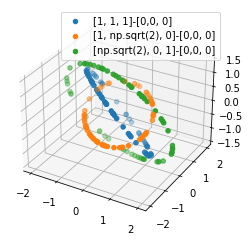

In [6]:
input_data = torch.randn(64,3)

transforms = []
ln = []


transforms.append('[1, 1, 1]-[0,0, 0]')
ln.append(nn.LayerNorm([3], elementwise_affine=True))
ln[-1].weight.data = torch.tensor([ 1, 1, 1], dtype=torch.float32)
ln[-1].bias.data = torch.tensor([ 0, 0, 0], dtype=torch.float32)

transforms.append('[1, np.sqrt(2), 0]-[0,0, 0]')
ln.append(nn.LayerNorm([3], elementwise_affine=True))
ln[-1].weight.data = torch.tensor([ 1, np.sqrt(2), 0], dtype=torch.float32)
ln[-1].bias.data = torch.tensor([ 0, 0, 0], dtype=torch.float32)


transforms.append('[np.sqrt(2), 0, 1]-[0,0, 0]')
ln.append(nn.LayerNorm([3], elementwise_affine=True))
ln[-1].weight.data = torch.tensor([ np.sqrt(2), 0, 1], dtype=torch.float32)
ln[-1].bias.data = torch.tensor([ 0, 0, 0], dtype=torch.float32)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label, norm in zip(transforms, ln):
    output = norm(input_data).detach()
    ax.scatter(output[:,0], output[:,1], output[:,2], label=label)
plt.legend()
plt.show()

# 3D Hypersphere more rotation

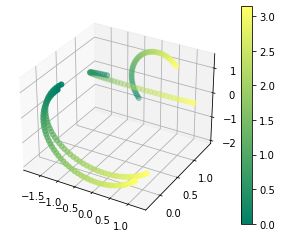

In [7]:
input_data = torch.randn(4,3)
#input_data[:,0] = input_data[:,0] + 4

transforms = []
ln = []


for i in np.linspace(0, np.pi):
    transforms.append(i)
    ln.append(nn.LayerNorm([3], elementwise_affine=True))
    ln[-1].weight.data = torch.tensor(np.ones(3) @ np.asarray([[np.cos(i), 0, -np.sin(i)],[0,1,0],[np.sin(i),0, np.cos(i)]]), dtype=torch.float32)
    ln[-1].bias.data = torch.tensor([ 0, 0, 0], dtype=torch.float32)

    #print(ln[-1].weight.data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a, b, c, d = [], [], [], []
for label, norm in zip(transforms, ln):
    output = norm(input_data).detach()
    a.append(output[:,0])
    b.append(output[:,1])
    c.append(output[:,2])
    d.append(np.ones_like(output[:,0]) * label)
    
a = np.concatenate(a)
b = np.concatenate(b)
c = np.concatenate(c)
d = np.concatenate(d)

cc = ax.scatter(a, b, c, c=d, cmap='summer', s=25)
fig.colorbar(cc)
plt.show()

# 3D differences after normalization for different input vectors 

[tensor([1., 1., 1.])]


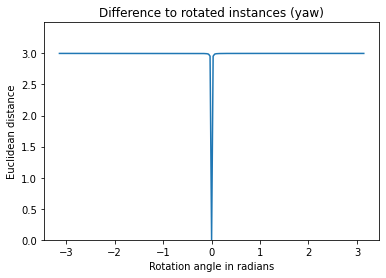

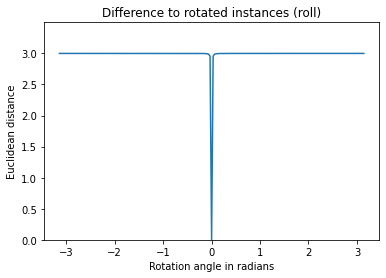

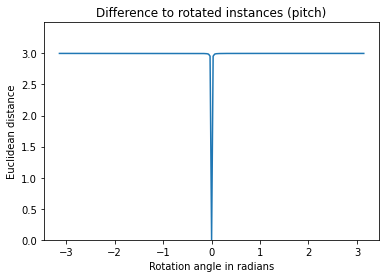

[tensor([1., 0., 0.])]


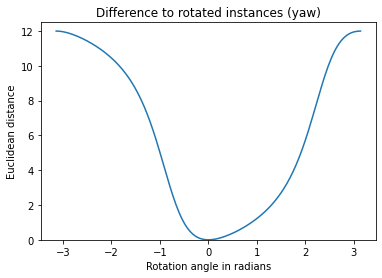

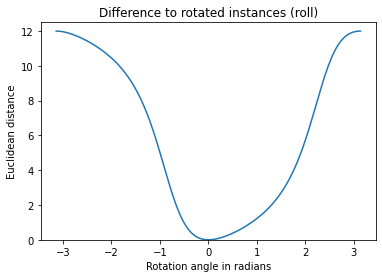

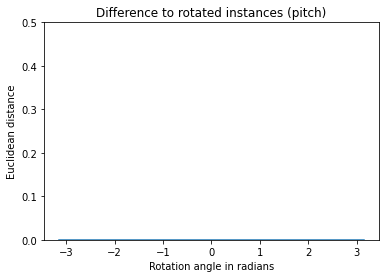

[tensor([0., 1., 0.])]


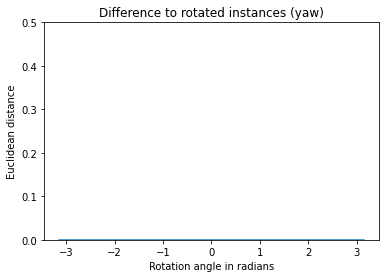

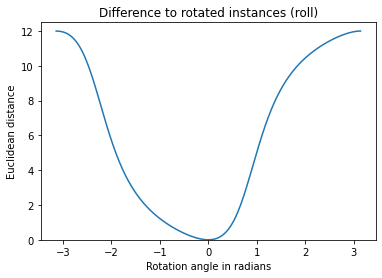

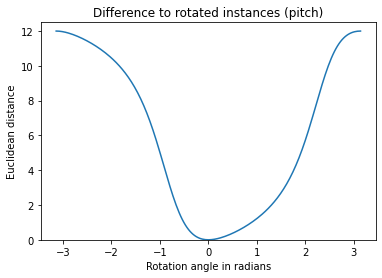

[tensor([0., 0., 1.])]


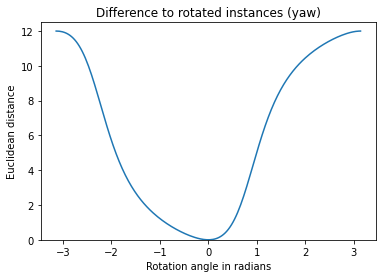

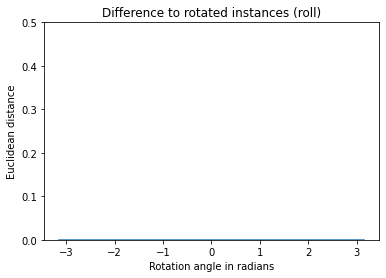

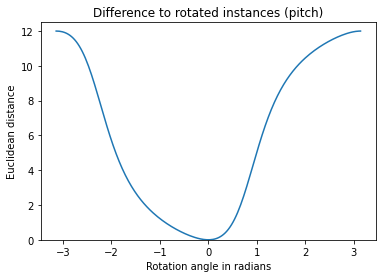

[tensor([1., 1., 0.])]


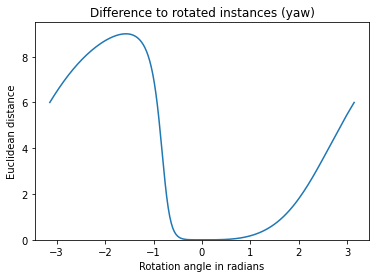

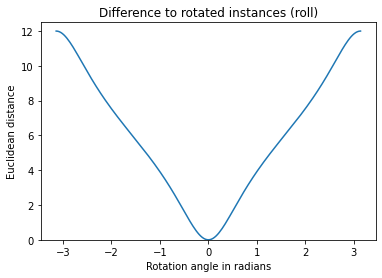

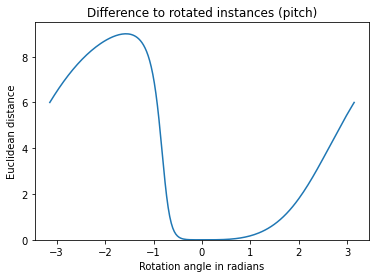

[tensor([1., 0., 1.])]


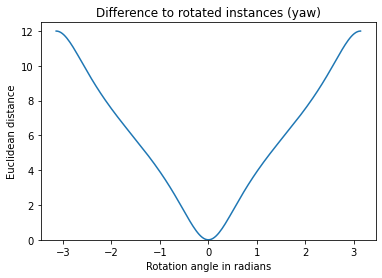

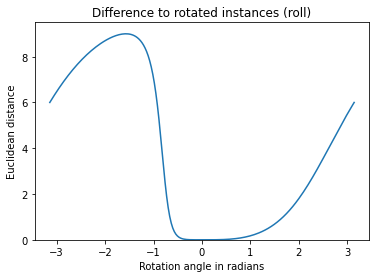

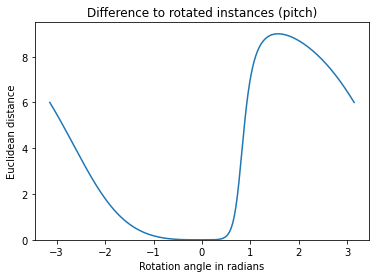

[tensor([0., 1., 1.])]


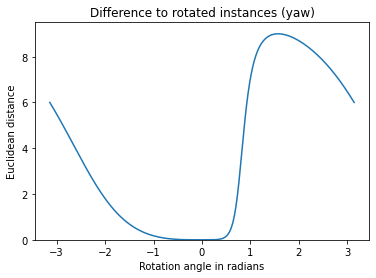

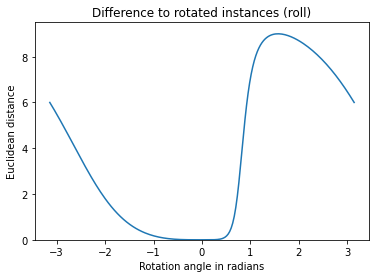

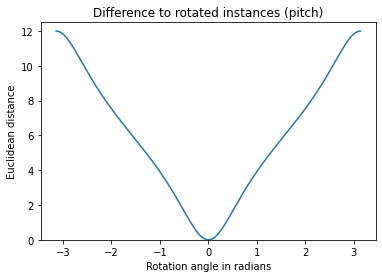

In [8]:
for input_data in [[torch.tensor([1,1,1.0])],[torch.tensor([1,0,0.0])],[torch.tensor([0,1,0.0])],
                   [torch.tensor([0,0,1.0])],[torch.tensor([1,1,0.0])],[torch.tensor([1,0,1.0])], [torch.tensor([0,1,1.0])]]:
    left0 = []
    right0 = []
    left1 = []
    right1 = []
    left2 = []
    right2= []

    x = []

    for angle in np.linspace(-np.pi, 0, num=100):
        if angle < 0:
            left0.append(input_data[0] @ torch.tensor(np.asarray([[np.cos(angle), 0, -np.sin(angle)],[0,1,0],[np.sin(angle),0, np.cos(angle)]])).type(torch.float32))
            left1.append(input_data[0] @ torch.tensor(np.asarray([[np.cos(angle), -np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]])).type(torch.float32))
            left2.append(input_data[0] @ torch.tensor(np.asarray([[1,0,0],[0,np.cos(angle), -np.sin(angle)],[0,np.sin(angle),np.cos(angle)]])).type(torch.float32))

            x.append(angle)

    x.append(0.0)
    for angle in np.linspace(0, np.pi, num=100):
        if angle > 0:
            right0.append(input_data[0] @ torch.tensor(np.asarray([[np.cos(angle), 0, -np.sin(angle)],[0,1,0],[np.sin(angle),0, np.cos(angle)]])).type(torch.float32))
            right1.append(input_data[0] @ torch.tensor(np.asarray([[np.cos(angle), -np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]])).type(torch.float32))
            right2.append(input_data[0] @ torch.tensor(np.asarray([[1,0,0],[0,np.cos(angle), -np.sin(angle)],[0,np.sin(angle),np.cos(angle)]])).type(torch.float32))
            x.append(angle)


    al0 = left0 + input_data + right0
    al1 = left1 + input_data + right1
    al2 = left2 + input_data + right2
    
    
    al0 = torch.stack(al0)
    al1 = torch.stack(al1)
    al2 = torch.stack(al2)

    out0= nn.LayerNorm([3])(al0)
    out1= nn.LayerNorm([3])(al1)
    out2= nn.LayerNorm([3])(al2)

    difference0 = ((out0 - out0[out0.shape[0]//2,None])**2).sum(dim=-1).detach()
    difference1 = ((out1 - out1[out1.shape[0]//2,None])**2).sum(dim=-1).detach()
    difference2 = ((out2 - out2[out2.shape[0]//2,None])**2).sum(dim=-1).detach()
    
    print(input_data)
    input_data = "_".join([str(int(x.item())) for x in input_data[0]])

    
    plt.title('Difference to rotated instances (yaw)')
    plt.ylabel('Euclidean distance')
    plt.xlabel('Rotation angle in radians')
    plt.plot(x, difference0)
    plt.ylim([0, max(difference0)+0.5])
    plt.savefig('diff_yaw_'+str(input_data)+'.svg',bbox_inches='tight' )
    plt.show()
    
    plt.title('Difference to rotated instances (roll)')
    plt.ylabel('Euclidean distance')
    plt.xlabel('Rotation angle in radians')
    plt.plot(x, difference1)
    plt.ylim([0, max(difference1)+0.5])
    plt.savefig('diff_roll_'+str(input_data)+'.svg',bbox_inches='tight' )
    plt.show()
    
    plt.title('Difference to rotated instances (pitch)')
    plt.ylabel('Euclidean distance')
    plt.xlabel('Rotation angle in radians')
    plt.plot(x, difference2)
    plt.ylim([0, max(difference2)+0.5])
    plt.savefig('diff_pitch_'+str(input_data)+'.svg',bbox_inches='tight' )
    plt.show()

# Layernorm same difference before can be different afterwards

[0.         0.23100677 0.46201354 0.69302034 0.9240271  1.1550338
 1.3860407  1.6170474  1.8480542  2.079061   2.3100677  2.5410745
 2.7720814  3.003088   3.2340949  3.4651017 ]


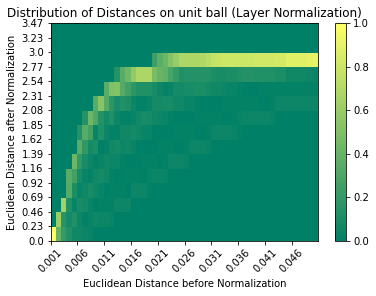

In [9]:
inp = torch.zeros(1,3)

ln = nn.LayerNorm([3])
inp_t = ln(inp)

rng = F.normalize(torch.randn(64, 3),dim=-1)


ll = []
for i in torch.linspace(0.001,0.05,50):
    outputs = ln(inp + rng * i)
    
    diffs = ((inp_t- outputs)**2).sum(dim=-1).view(-1).detach().numpy()
    
    #print(np.histogram(diffs, bins=15, range=[0, 2 * np.sqrt(3)+0.1]))
    ll.append(np.histogram(diffs, bins=15, range=[0, 2 * np.sqrt(3)+0.001])[0])
    #plt.title(str(i))
    #plt.hist(diffs, bins=15, range=[0, 2 * np.sqrt(3)+0.1])
    #plt.show()
    
ll = np.stack(ll, axis=1)
ll = ll/  ll.sum(axis=0, keepdims=True)

bins, intervalls = np.histogram(diffs, bins=15, range=[0, 2 * np.sqrt(3)+0.001])
print(intervalls)
plt.title('Distribution of Distances on unit ball (Layer Normalization)')
plt.pcolormesh(ll, cmap='summer')
plt.xlabel('Euclidean Distance before Normalization')
plt.ylabel('Euclidean Distance after Normalization')
plt.yticks(range(len(intervalls)), np.round(intervalls, decimals=2))
plt.xticks(range(0,ll.shape[1],5), np.round(np.linspace(0.001,0.05,50)[::5],3), rotation=45)
plt.colorbar()
plt.savefig('dist_ln.svg',bbox_inches='tight')
plt.show()
    

# Batchnorm same difference before is the same difference afterwards

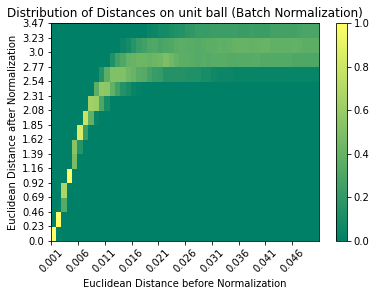

In [10]:
inp = torch.zeros(1,3)

ln = nn.BatchNorm1d(3)
#inp_t = ln(inp)

rng = F.normalize(torch.randn(64, 3),dim=-1)


ll = []
for i in torch.linspace(0.001,0.05,50):
    outputs = ln(torch.cat([inp,inp + rng * i], dim=0))
    inp_t =outputs[0]
    outputs = outputs[1:]
    
    diffs = ((inp_t- outputs)**2).sum(dim=-1).view(-1).detach().numpy()
    
    #print(np.histogram(diffs, bins=15, range=[0, 2 * np.sqrt(3)+0.1]))
    ll.append(np.histogram(diffs, bins=15, range=[0, 2 * np.sqrt(3)+0.001])[0])
    #plt.title(str(i))
    #plt.hist(diffs, bins=15, range=[0, 2 * np.sqrt(3)+0.1])
    #plt.show()
    

ll = np.stack(ll, axis=1)
ll = ll/  ll.sum(axis=0, keepdims=True)
bins, intervalls = np.histogram(diffs, bins=15, range=[0, 2 * np.sqrt(3)+0.001])

plt.title('Distribution of Distances on unit ball (Batch Normalization)')
plt.pcolormesh(ll, cmap='summer')
plt.xlabel('Euclidean Distance before Normalization')
plt.ylabel('Euclidean Distance after Normalization')
plt.yticks(range(len(intervalls)), np.round(intervalls, decimals=2))
plt.xticks(range(0,ll.shape[1],5), np.round(np.linspace(0.001,0.05,50)[::5],3), rotation=45)
plt.colorbar()
plt.savefig('dist_bn.svg',bbox_inches='tight')
plt.show()
    

# Batchnorm Transformation example

<ipython-input-11-d1815f37409e>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='3d')


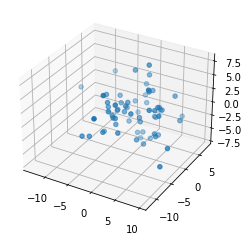

<ipython-input-11-d1815f37409e>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='3d')


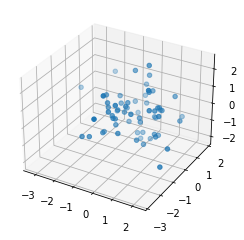

In [11]:
input_data = 4 * torch.randn(64,3)
output = nn.BatchNorm1d([3],affine=False)(input_data)

fig = plt.figure()
plt.title('Input data')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(input_data[:,0], input_data[:,1], input_data[:,2])
plt.savefig('input3d_bn.svg', bbox_inches='tight')
plt.show()


fig = plt.figure()
plt.title('Input data after Layer Normalization')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(output[:,0], output[:,1], output[:,2])
plt.savefig('output3d_bn.svg', bbox_inches='tight')
plt.show()